In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%autosave 1

data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "data")
fig_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "figs")

def alpha(t, tau=1): return 1/tau**2*t*np.exp(-t/tau)

Autosaving every 1 seconds


In [15]:
# spk_100_weights = np.loadtxt(os.path.join(data_path, "spk_train_weights_100.txt"))
def load_spk_train(N=128, Nt=10000):
    with open(os.path.join(data_path, f"spk_train_{N}_{Nt}.pickle"), "rb") as f:
        spk_train = pickle.load(f)
    return spk_train

spk_weights = load_spk_train().weight_matrix

Text(0.5, 1.0, 'J_00')

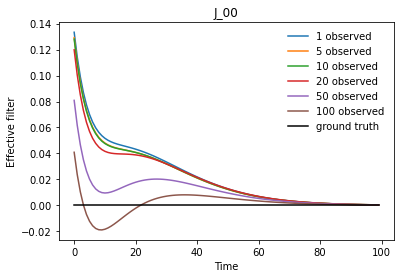

In [9]:
for obs in [1, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J00_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")
plt.plot(np.zeros_like(filter), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_01')

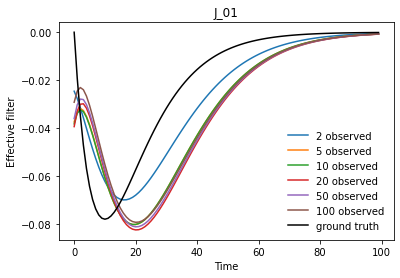

In [23]:
for obs in [2, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J01_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")

plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

Text(0.5, 1.0, 'J_01')

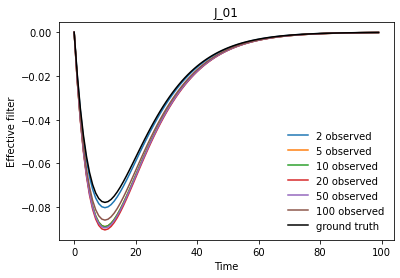

In [6]:
for obs in [2, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J01_1basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")

plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

In [ ]:
# to do:

# use different amount data in spike train [200000, ..., 2000000], see if convergence happens when more data is used in inference

# check if ground truth can be recovered exactly, if resrict the use of basis to t*exp(-t); check timescale match

# go to network of 1024 neurons; 256 neurons; log plot even spaced; memory issue

# change the strength of J0: [0.25, 0.5, 0.75, 0.9]; weak synapse case std ~/N for J0 = 0.9 for Fig 5 in hidden neuron paper; keep sparsity 0.3

# covariance plot compared to inferred filters; similarity analysis

# acausal filter for less observed network


In [3]:
spk_train.spike_train[100000:120000,:]

NameError: name 'spk_train' is not defined

(array([[19575.,     0.,     0., ...,     0.,     0.,     0.],
        [19854.,     0.,     0., ...,     0.,     0.,     0.],
        [19595.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [19407.,     0.,     0., ...,     0.,     0.,     0.],
        [19237.,     0.,     0., ...,     0.,     0.,     0.],
        [19633.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 128 BarContainer objects>)

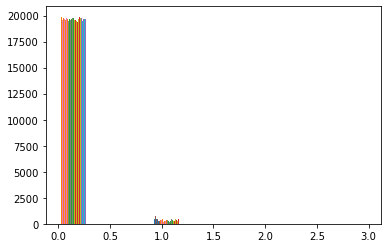

In [6]:
plt.hist(spk_train.spike_train[100000:120000,:])

In [10]:
spk_train.spike_time[0][::-1]

[99999.45000000001,
 99999.20000000001,
 99998.8,
 99995.35,
 99987.5,
 99987.40000000001,
 99987.15000000001,
 99983.65000000001,
 99982.90000000001,
 99982.75,
 99979.70000000001,
 99979.1,
 99973.05,
 99969.75,
 99969.40000000001,
 99969.1,
 99966.95000000001,
 99965.70000000001,
 99964.5,
 99964.0,
 99962.95000000001,
 99961.1,
 99959.95000000001,
 99959.6,
 99957.70000000001,
 99954.3,
 99954.15000000001,
 99954.05,
 99950.55,
 99950.1,
 99949.65000000001,
 99945.95000000001,
 99940.1,
 99938.35,
 99934.85,
 99932.6,
 99930.0,
 99926.95000000001,
 99926.55,
 99925.1,
 99924.8,
 99922.70000000001,
 99921.95000000001,
 99921.90000000001,
 99919.35,
 99917.40000000001,
 99916.95000000001,
 99916.20000000001,
 99914.8,
 99914.3,
 99914.20000000001,
 99910.75,
 99908.5,
 99908.15000000001,
 99906.3,
 99904.05,
 99903.55,
 99896.8,
 99895.3,
 99891.90000000001,
 99888.05,
 99886.85,
 99885.45000000001,
 99883.35,
 99882.8,
 99882.40000000001,
 99882.15000000001,
 99882.0,
 99881.85,
 99

[8000, 8050]
[3488, 1255, 3172, 2294, 4360, 5774, 3131, 2343, 4423, 3374, 3563, 2012, 6370, 4220, 3058, 3218, 2787, 7807, 3682, 5392, 1980, 3638, 4665, 2146, 3032, 1700, 1886, 2528, 6004, 2664, 2835, 2947, 2740, 3595, 2404, 3908, 3017, 4385, 2784, 3377, 3708, 3618, 2904, 3943, 1993, 2487, 1562, 2959, 1915, 2621, 3058, 2442, 2968, 3896, 3382, 4275, 1823, 2026, 2205, 5684, 1740, 2546, 1910, 3402, 5594, 5211, 2159, 3127, 4045, 3531, 3179, 4068, 2511, 3290, 2561, 3290, 4363, 1276, 4494, 2505, 3385, 3661, 2291, 4984, 1270, 2745, 2285, 3305, 2774, 4192, 3075, 4799, 3003, 1245, 4782, 2173, 5307, 2518, 2179, 3748, 3443, 2899, 1400, 2350, 1866, 3075, 4526, 2171, 3486, 4117, 3181, 3261, 1799, 3171, 3490, 3448, 2826, 976, 2350, 2552, 3047, 3880, 2746, 4195, 2701, 4772, 6292, 2688]
[3508, 1267, 3191, 2306, 4390, 5810, 3150, 2358, 4458, 3398, 3590, 2028, 6406, 4247, 3082, 3239, 2806, 7841, 3699, 5433, 1992, 3657, 4695, 2157, 3058, 1716, 1904, 2540, 6038, 2686, 2852, 2965, 2753, 3619, 2425, 3935, 30

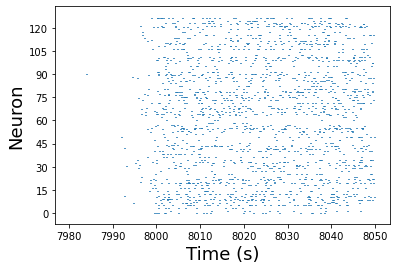

In [15]:
# raster plot

spk_train = load_spk_train()
spk_train.plot_raster(t_window=[8000,8050])

Text(0.5, 1.0, 'J_00')

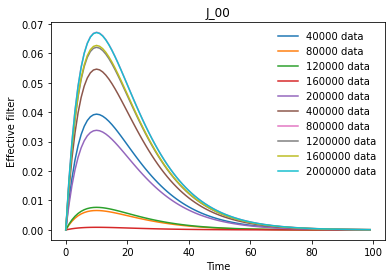

In [22]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons-J00", f"1_basis_128_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_11')

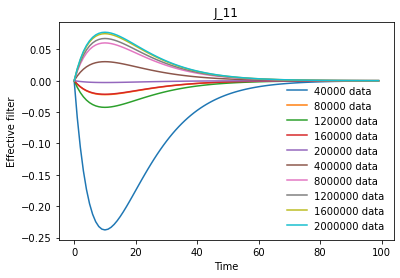

In [3]:
# 128 neurons; J11; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07", f"1_basis_128_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_11")

Text(0.5, 0, 'Data volume')

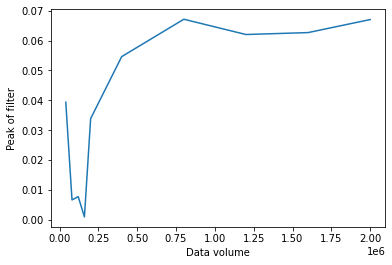

In [2]:
# 128 neurons; different amount of data, peak change as a function of data volume
peak = []
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons-J00", f"1_basis_128_observed_{Nt}_data.txt"))
    peak.append(np.max(filter))

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.plot([int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]], peak)
# plt.xscale('log')
plt.ylabel("Peak of filter")
plt.xlabel("Data volume")

Text(0.5, 1.0, 'J_00')

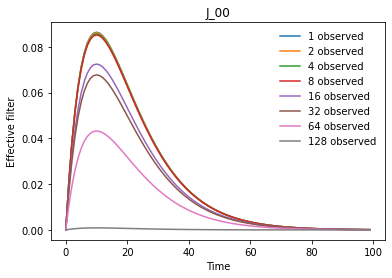

In [10]:
# 128 neurons; different number of observed neurons; data 160000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_160000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_00')

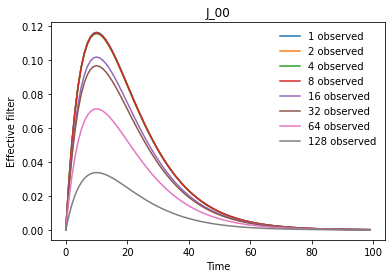

In [4]:
# 128 neurons; different number of observed neurons; data 200000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_200000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_00')

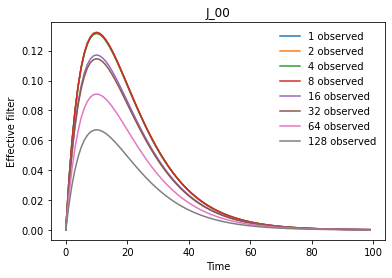

In [5]:
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for obs in [2**i for i in range(8)]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-06-128neurons", f"1_basis_{obs}_observed_2000000_data.txt"))
    plt.plot(filter, label=f"{obs} observed")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'C_00')

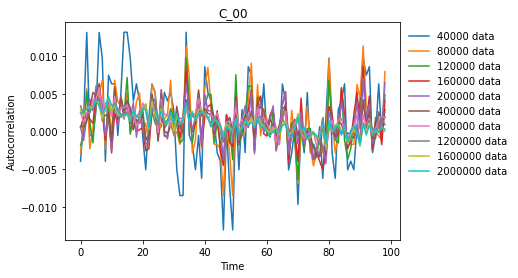

In [17]:
# 128 neurons; autocorrelation of neuron 0 with different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07-128neurons-correlation-C00", f"correlation_{Nt}_data.txt"))
    plt.plot(filter[1:], label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False, bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title("C_00")

Text(0.5, 1.0, 'J_6_82')

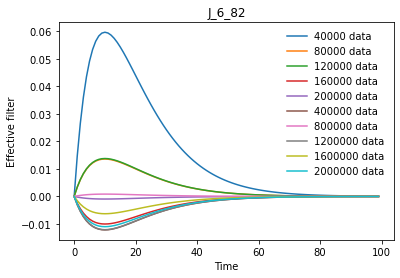

In [2]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07-128neurons-J82-6", f"1_basis_84_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_82_6")

Text(0.5, 1.0, 'J_6_82')

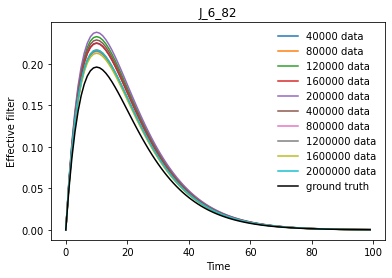

In [11]:
# 128 neurons; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-07", f"1_basis_84_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

plt.plot(spk_weights[6, 82] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_6_82")

In [ ]:
# to do: 2022-07-07

# J11: does 160000 data points also give zero inferred filters? More data leads to deviation?
# 200000 closest to zero then deviate

# input driven regime vs. stochasticity driven regime in 2 neurons case
# identifiability of GLM; eigenvalues of Hessian at the point of optimal fit;
# First, block neuron connections, spontaneous activity with self-history filter, infer the self-connection and bias first
# then, use the inferred self-connection and bias in full network inference with neuron interactions


Text(0.5, 1.0, 'J_11')

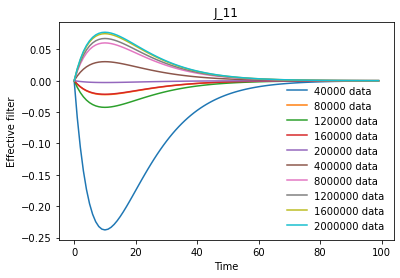

In [14]:
# 128 neurons; J11; different amount of data
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-14", f"1_basis_128_observed_{Nt}_data.txt"))
    plt.plot(filter, label=f"{Nt} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_11")

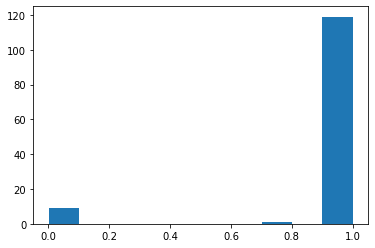

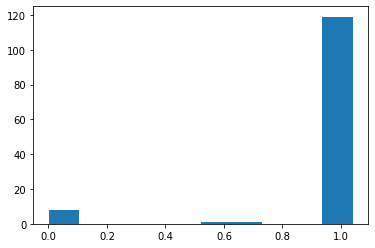

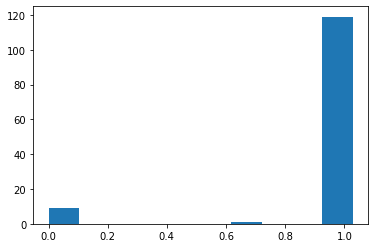

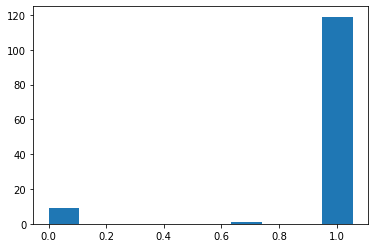

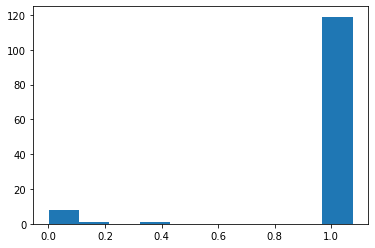

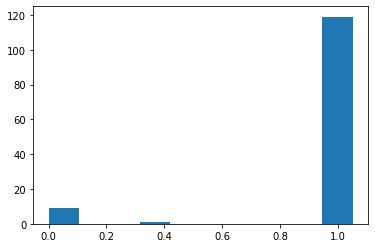

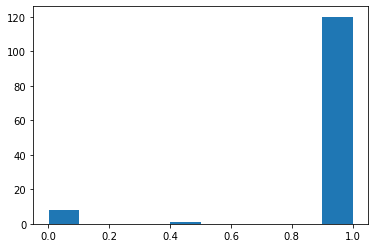

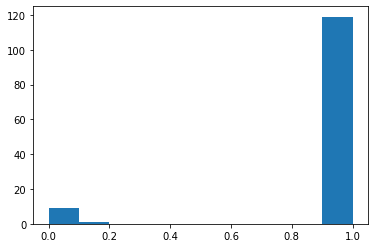

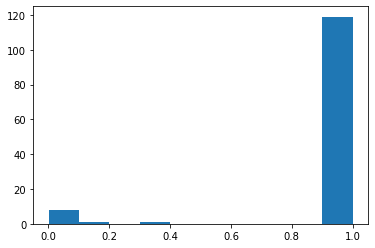

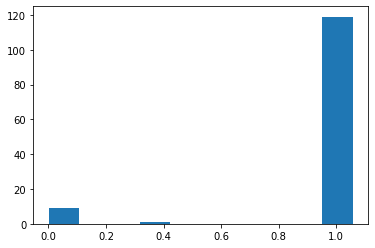

In [7]:
# eigenvalues of hessian
min_eigval = []
min_eigvector = []
for Nt in [int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    hessian = np.loadtxt(os.path.join(data_path, "2022-07-14", f"1_basis_128_observed_{Nt}_data_hessian.txt"))
    # eigval = np.linalg.eigvals(hessian)
    # eigvector = np.linalg.eigv
    w, v = np.linalg.eig(np.linalg.inv(hessian))
    min_eigvector.append(v[:, np.argmin(w)])
    min_eigval.append(np.min(w))
    plt.hist(w.real)
    plt.show()

/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


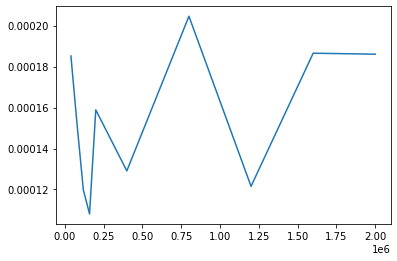

In [8]:
plt.plot([int(2000000 * i) for i in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1]], min_eigval)

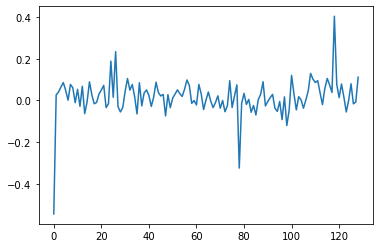

In [10]:
plt.plot(min_eigvector[0].real)

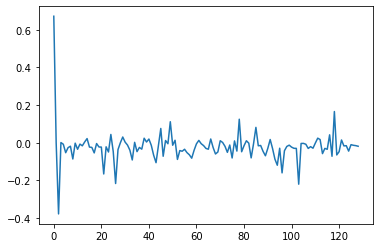

In [9]:
plt.plot(min_eigvector[1].real)

In [ ]:
# 2022-07-14
# decrease the fit tolerance from 10-4 to smaller to see if more data give better fit?
# set self coupling filter and bias to ground truth; how sensitivity changes in this case?
# 2 neuron case, change the coupling strength and check the hessian eigenvalues

Text(0.5, 1.0, 'J_00')

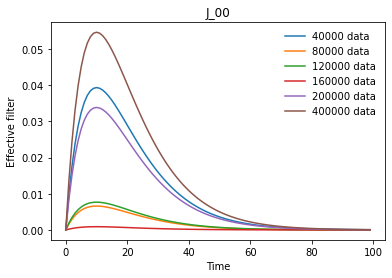

In [11]:
# defualt tolerance 10-8
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-8", f"J_00_1_basis_128_observed_{int(data*2000000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*2000000)} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_00')

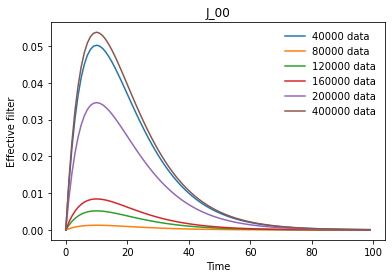

In [10]:
# defualt tolerance 10-4
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-4", f"J_00_1_basis_128_observed_{int(data*2000000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*2000000)} data")

# plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_01')

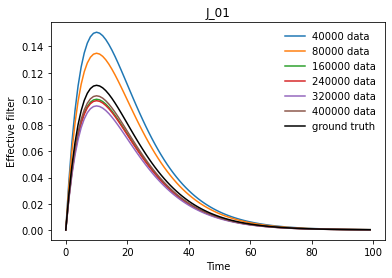

In [6]:
# defualt tolerance 10-4, J01, ground truth 0.3
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-4-J00-01-10", f"J_01_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

Text(0.5, 1.0, 'J_01')

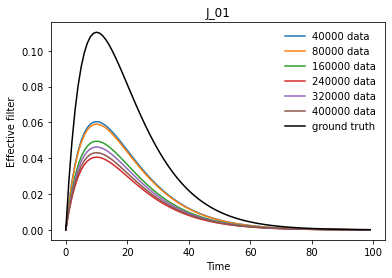

In [2]:
# defualt tolerance 10-3, J01, ground truth 0.3
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-3-J00-01-10", f"J_01_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")

Text(0.5, 1.0, 'J_00, 1e-3')

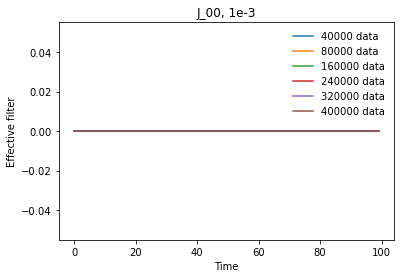

In [3]:
# defualt tolerance 10-3, J00
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-3-J00-01-10", f"J_00_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

# plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00, 1e-3")

Text(0.5, 1.0, 'J_00, 1e-5')

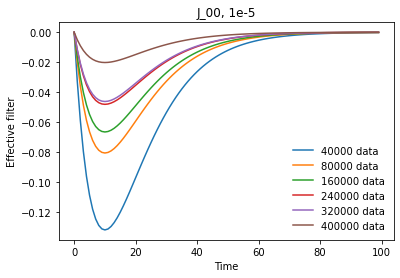

In [4]:
# defualt tolerance 10-5, J00
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-5-J00-01-10", f"J_00_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

# plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00, 1e-5")

Text(0.5, 1.0, 'J_01 1e-5')

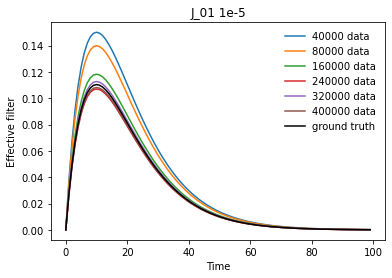

In [5]:
# defualt tolerance 10-5, J01, ground truth 0.5
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-5-J00-01-10", f"J_01_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01 1e-5")

Text(0.5, 1.0, 'J_01 1e-5')

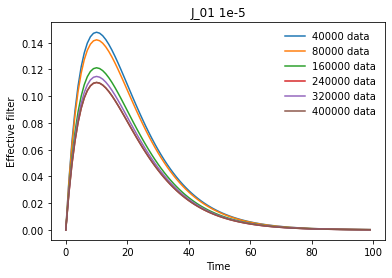

In [4]:
# defualt tolerance 10-5, J01, ground truth 0.5 exclude self 
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-5-J01-10-exclude-self", f"J_01_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

# plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01 1e-5")

Text(0.5, 1.0, 'J_10 1e-5')

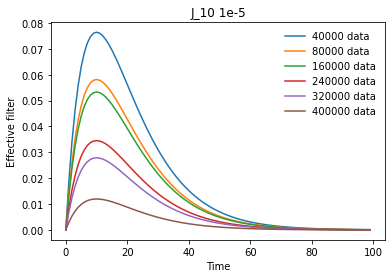

In [3]:
# defualt tolerance 10-5, J01, ground truth 0.5 exclude self 
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
for data in [0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    filter = np.loadtxt(os.path.join(data_path, "2022-07-27-tol10-5-J01-10-exclude-self", f"J_10_1_basis_128_observed_{int(data*400000)}_data.txt"))
    plt.plot(filter, label=f"{int(data*400000)} data")

# plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_10 1e-5")

In [ ]:
# 2022-07-28
# max iter 100 reached in tol 10-8? 10-4?  No; a typical iter is 53; max is set to 200000
# intercept -4? ground truth -1? dt=0.1   exp(W@s+b)*dt.  intercept = log(dt)+b = -3.3
# set self coupling and baseline to ground truth, with bayesian prior?
# increase data volume beyond 400000 to see if the fit starts to deviate
# basis order [0,1,2] (covariance comparision) vs [1,2,3] (hidden neuron theory)
# eigenvalue spectrum of weight matrix vs. inferred weight matrix, in 1 basis case
# hessian? if excluding the self-coupling, does the model becomes more sloppy? histogram of eigenvalues.

In [22]:
from mle.inference import Maximum_likelihood_estimator as MLE

mle = MLE(filter_length=100, dt=0.1, basis_order=[0, 1, 2], observed=range(128), tau=1)
# mle.plot_inferred(spike_train=spk_train.spike_train, W_true=spk_train.weight_matrix,
#                   ylim=0.3, basis_free_infer=True, savefig=False, figname='')
spk_train = load_spk_train(N=128, Nt=400000)
inferred = mle.infer_J_ij_basis(0, 1, spike_train=spk_train.spike_train[:,:], tol=1e-8, exclude_self_coupling=False)

In [23]:
inferred.n_iter_

219

In [5]:
inferred.max_iter

200000

In [21]:
inferred.intercept_

-3.6117543793649665

In [25]:
inferred.intercept_

-3.9162704518724807

In [11]:
np.exp(-4)

0.01831563888873418

In [12]:
np.exp(-1)

0.36787944117144233

In [16]:
np.log(0.1)-1

-3.3025850929940455

Text(0.5, 1.0, 'J_10 1e-5')

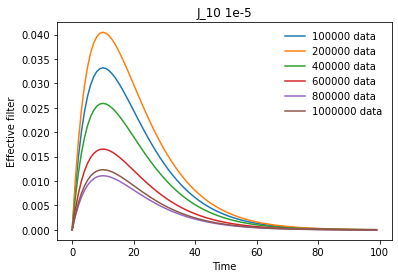

In [7]:
# defualt tolerance 10-5, J01, ground truth 0.5 exclude self 
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
Nt = 1000000
for data in [int(i*Nt) for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-08-04-tol10-5-exclude-self", f"J_10_1_basis_128_observed_{data}_data.txt"))
    plt.plot(filter, label=f"{data} data")

# plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_10 1e-5")

Text(0.5, 1.0, 'J_01 1e-5')

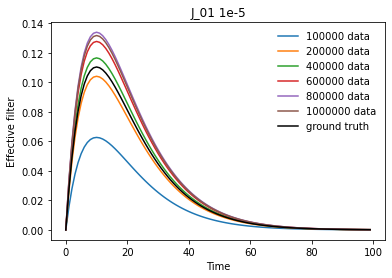

In [10]:
# defualt tolerance 10-5, J01, ground truth 0.5 exclude self 
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
Nt = 1000000
for data in [int(i*Nt) for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-08-04-tol10-5-exclude-self", f"J_01_1_basis_128_observed_{data}_data.txt"))
    plt.plot(filter, label=f"{data} data")

plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01 1e-5")

Text(0.5, 1.0, 'J_01 1e-5')

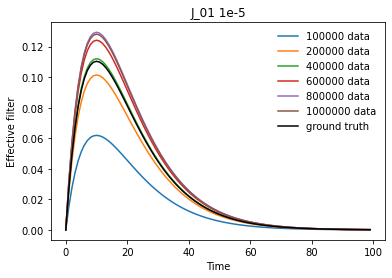

In [21]:
# defualt tolerance 10-5, J01, ground truth 0.5 not exclude self 
# 128 neurons; different number of observed neurons; data 2000000, more data leads to more deviation
Nt = 1000000
for data in [int(i*Nt) for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    filter = np.loadtxt(os.path.join(data_path, "2022-08-04-tol10-5-not-exclude-self", f"J_01_1_basis_128_observed_{data}_data.txt"))
    plt.plot(filter, label=f"{data} data")

plt.plot(0.3 * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.1]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01 1e-5")

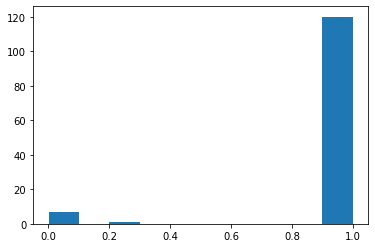

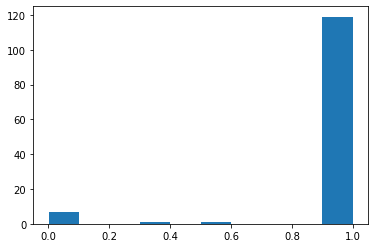

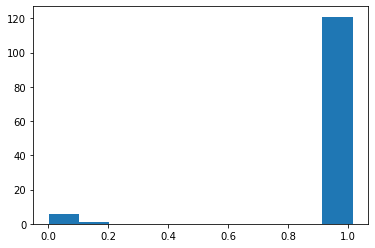

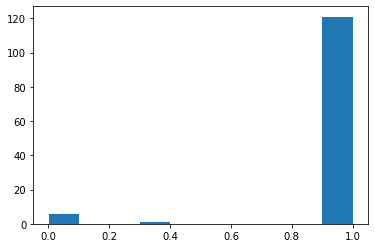

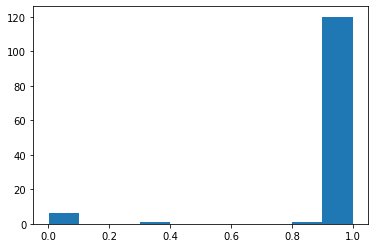

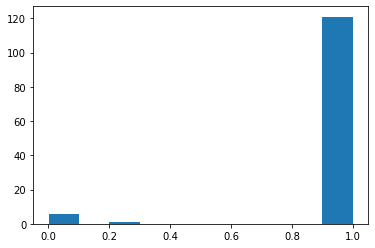

In [10]:
# eigenvalues of hessian; exclude self-coupling
min_eigval = []
min_eigvector = []
for Nt in [int(1000000 * i) for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    hessian = np.loadtxt(os.path.join(data_path, "2022-08-04-tol10-5-exclude-self", f"J_01_1_basis_128_observed_{Nt}_data_hessian.txt"))
    # eigval = np.linalg.eigvals(hessian)
    # eigvector = np.linalg.eigv
    w, v = np.linalg.eig(np.linalg.inv(hessian))
    min_eigvector.append(v[:, np.argmin(w)])
    min_eigval.append(np.min(w))
    plt.hist(w.real)
    plt.show()

In [3]:
min_eigval # exclude self-coupling

[(0.00031566682459386675+0j),
 (0.0003977744402063647+0j),
 (0.0003861373895720149+0j),
 (0.0003972802025737309+0j),
 (0.0003806832704400233+0j),
 (0.0003578843546283971+0j)]

/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


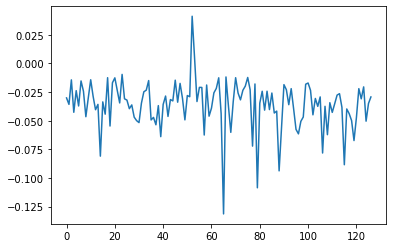

In [12]:
plt.plot(min_eigvector[-1][1:])

/home/tong/anaconda3/envs/glm/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


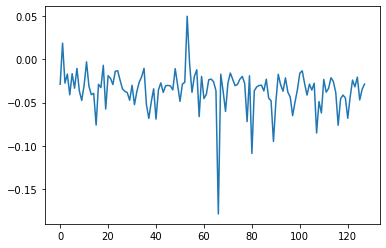

In [15]:
plt.plot(-1 * min_eigvector[-1][1:])

In [6]:
min_eigval # not exclude

[(0.00030782194218985186+0j),
 (0.0003474137291427499+0j),
 (0.00039183603297214905+0j),
 (0.00039270845430531176+0j),
 (0.00039582763867981706+0j),
 (0.0003842783912280963+0j)]

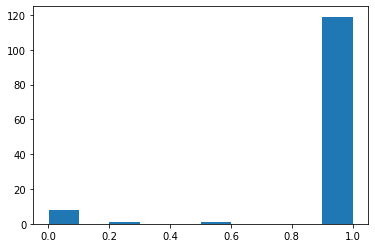

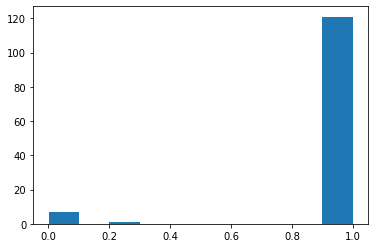

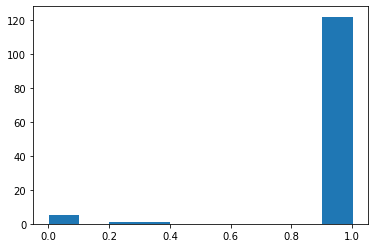

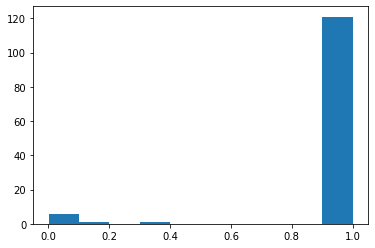

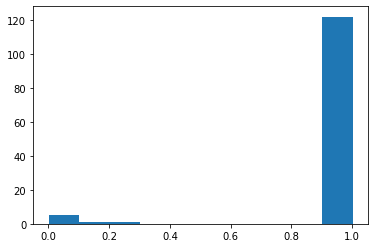

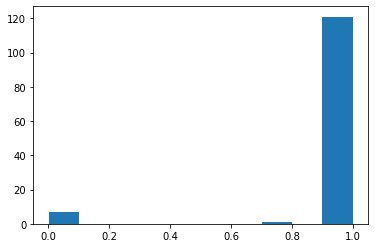

In [13]:
# eigenvalues of hessian; not exclude self-coupling
min_eigval = []
min_eigvector = []
for Nt in [int(1000000 * i) for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1]]:
    hessian = np.loadtxt(os.path.join(data_path, "2022-08-04-tol10-5-not-exclude-self", f"J_01_1_basis_128_observed_{Nt}_data_hessian.txt"))
    # eigval = np.linalg.eigvals(hessian)
    # eigvector = np.linalg.eigv
    w, v = np.linalg.eig(np.linalg.inv(hessian))
    min_eigvector.append(v[:, np.argmin(w)])
    min_eigval.append(np.min(w))
    plt.hist(w.real)
    plt.show()

In [5]:
min_eigval

[(0.00030782194218985186+0j),
 (0.0003474137291427499+0j),
 (0.00039183603297214905+0j),
 (0.00039270845430531176+0j),
 (0.00039582763867981706+0j),
 (0.0003842783912280963+0j)]

In [ ]:
# 2022-08-04

# 2 neuron case no alpha function: hessian; fix baseline and self-coupling
# implement mle and impose ground truth baseline and filters for specified pairs of neurons

# eigenvalue spectrum of weight matrix vs. inferred weight matrix, in 1 basis case: with 400000 data points; observe less data 16, 32, 64, 128...
# more eigenvalues to show distribution: combine eienvalues from different trials -- different networks with same statistics
# for partially observed case, choose different sets of observed neurons, permutation

# convhull in matlab; scipy.spatial.ConvexHull


Text(0.5, 1.0, 'ground truth weight matrix eigenvalue distribution')

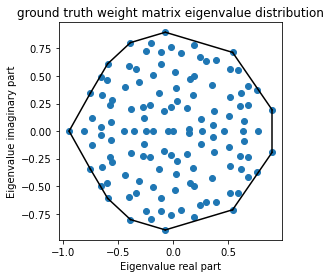

In [3]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
eignvals = np.linalg.eigvals(spk_weights)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("ground truth weight matrix eigenvalue distribution")

Text(0.5, 1.0, 'inferred weight matrix eigenvalue distribution')

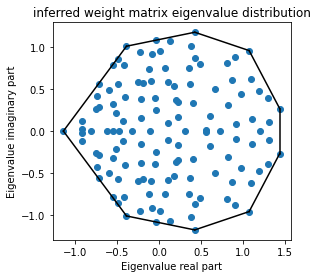

In [4]:
inferred_weight = np.loadtxt("/home/tong/hidden-neuron-simulation/data/2022-08-10/inferred_weight_matrix_128_observed.txt")
eignvals = np.linalg.eigvals(inferred_weight)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("inferred weight matrix eigenvalue distribution")

Text(0.5, 1.0, 'inferred weight matrix eigenvalue distribution 64 observed neurons')

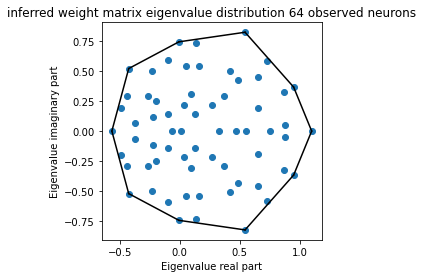

In [6]:
inferred_weight = np.loadtxt("/home/tong/hidden-neuron-simulation/data/2022-08-10/inferred_weight_matrix_64_observed.txt")
eignvals = np.linalg.eigvals(inferred_weight)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("inferred weight matrix eigenvalue distribution 64 observed neurons")

Text(0.5, 1.0, 'inferred weight matrix eigenvalue distribution 32 observed neurons')

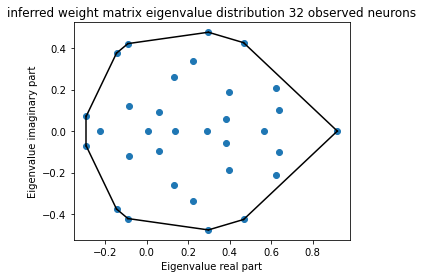

In [7]:
inferred_weight = np.loadtxt("/home/tong/hidden-neuron-simulation/data/2022-08-10/inferred_weight_matrix_32_observed.txt")
eignvals = np.linalg.eigvals(inferred_weight)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("inferred weight matrix eigenvalue distribution 32 observed neurons")

In [ ]:
# 2022-08-11
# generate ground truth matrix with given shape of eigenvalue distribution: does the inferred weight matrix 
# preserve the shape of the eigenvalue distribution?
# rejection sampling: reject |x|^p + |y|^p > 1 for x, y in uniform [-1, 1]; eigenvalues \lambda = x + i * y; 
# complex conjugate pairs for eigenvalues: generate only half numbers of the eigenvalues needed and use the conjugate for the
# next half

# 2 neuron case: does sensitivity change if we fix bias or self-coupling filter?

# test my own mle vs. sklearn; fix bias or self-coupling

In [8]:
p = 0.5

def sample_eigenvalues(num, p):
    eigen = []
    # counter = 0
    while len(eigen) < num:
        # counter += 1
        x, y = np.random.uniform(-1, 1, 2)
        if abs(x)**p + abs(y)**p <= 1:
            eigen.append(complex(x, y))
    return eigen

eigenvalues = sample_eigenvalues(128, 0.5)


Text(0.5, 1.0, 'ground truth weight matrix eigenvalue distribution')

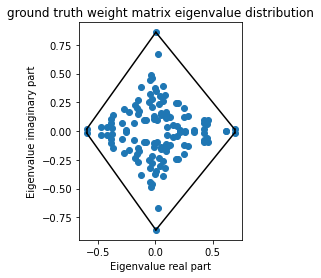

In [44]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
eignvals_sampled = sample_eigenvalues(64, 0.5)
eignvals_sampled = eignvals_sampled + [np.conjugate(i) for i in eignvals_sampled]
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals_sampled])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("ground truth weight matrix eigenvalue distribution")

Text(0.5, 1.0, 'ground truth weight matrix eigenvalue distribution')

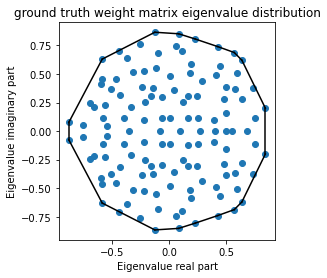

In [16]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
eignvals = np.linalg.eigvals(spk_weights)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("ground truth weight matrix eigenvalue distribution")

In [18]:
w, v = np.linalg.eig(spk_weights)

(128, 128)


Text(0.5, 1.0, 'ground truth weight matrix eigenvalue distribution')

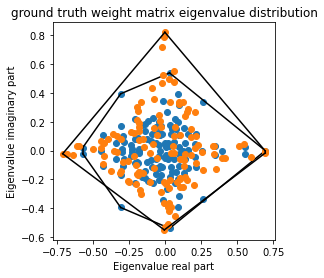

In [42]:
weight_reconstructed = v @ np.diag(eignvals_sampled) @ np.linalg.inv(v)
print(weight_reconstructed.shape)
eignvals = np.linalg.eigvals(weight_reconstructed.real)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("ground truth weight matrix eigenvalue distribution")

eignvals = np.linalg.eigvals(weight_reconstructed)
points = np.array([[eignval.real, eignval.imag] for eignval in eignvals])
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.gca().set_aspect('equal')
plt.xlabel("Eigenvalue real part")
plt.ylabel("Eigenvalue imaginary part")
plt.title("ground truth weight matrix eigenvalue distribution")

In [33]:
weight_reconstructed.real

array([[ 0.02489897,  0.09668581,  0.47787878, ..., -0.19515913,
         0.16493375, -0.23145541],
       [ 0.56467698, -0.26063658,  0.43372523, ...,  0.14817532,
        -0.13302559,  0.28073445],
       [ 0.175999  ,  0.03977765, -0.23902618, ..., -0.16147512,
         0.18130788, -0.11955062],
       ...,
       [ 0.19204957, -0.14393762, -0.42337427, ...,  0.0722671 ,
        -0.15183874, -0.17435992],
       [ 0.1417512 ,  0.06954442, -0.35266361, ..., -0.12346234,
         0.2144357 , -0.04559974],
       [-0.02562157,  0.31818561, -0.15621597, ..., -0.20626757,
        -0.05723275,  0.3699894 ]])